# **Simulação de Vetores RSSI com 10 APs em Área 20m x 20m**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Parâmetros do ambiente
area_size = 20  # metros (20x20 = 400 m²)
grid_step = 1   # distância entre pontos (1 metro)
n_aps = 10      # número de Access Points
n_measurements = 10  # medições por ponto
frequency = 2.4e9     # Hz
pt = 20              # potência de transmissão (dBm)
pl0 = 40             # perda no ponto referência (dB)
mu = 3.5             # expoente de perda (típico para indoor)
sigma = 2            # desvio padrão do ruído (shadowing)
d0 = 1               # distância referência (m)

# Gerar posições fixas dos APs aleatoriamente
np.random.seed(42)
ap_positions = np.random.uniform(0, area_size, size=(n_aps, 2))

# Grelha de pontos no ambiente
x_coords = np.arange(0, area_size + grid_step, grid_step)
y_coords = np.arange(0, area_size + grid_step, grid_step)
positions = np.array([(x, y) for x in x_coords for y in y_coords])

# Função para calcular RSSI para um ponto
def simulate_rssi(point):
    rssi_values = []
    for ap in ap_positions:
        d = np.linalg.norm(point - ap)
        d = max(d, d0)  # evita log(0)
        path_loss = pl0 + 20 * np.log10(frequency) + 10 * mu * np.log10(d / d0)
        noise = np.random.normal(0, sigma)
        rssi = pt - path_loss + noise
        rssi = max(rssi, -110)  # truncar mínimo
        rssi_values.append(rssi)
    return rssi_values

# Gerar medições para cada ponto
simulated_data = []
for pos in positions:
    for _ in range(n_measurements):
        rssi_vector = simulate_rssi(pos)
        simulated_data.append(rssi_vector + [pos[0], pos[1]])  # append X, Y


In [9]:

# DataFrame final
columns = [f'WAP{str(i+1).zfill(3)}' for i in range(n_aps)] + ['X', 'Y']
df_simulated = pd.DataFrame(simulated_data, columns=columns)

# Salvar CSV
path_save1 = '/home/darkcover/Documentos/Gan/Outputs/simulated_rssi.csv'
df_simulated.to_csv(path_save1, index=False)
print(f"Simulação concluída! Dados salvos em 'data/simulated_rssi.csv'. Total: {len(df_simulated)} entradas.")

Simulação concluída! Dados salvos em 'data/simulated_rssi.csv'. Total: 441000 entradas.


## O que esse código faz:

* Gera **RSSI realistas** com ruído para uma área de 20×20 m² com 1 metro de resolução.
* Cada ponto tem **10 medições independentes**.
* Calcula a perda de percurso com ruído (shadowing) conforme descrito no artigo.
* Salva os dados prontos para treino no formato:

  ```
  WAP001, ..., WAP010, X, Y
  ```

---


## Se quiser visualizar:

/home/darkcover/.cache/pypoetry/virtualenvs/gan-oPyfrVEv-py3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


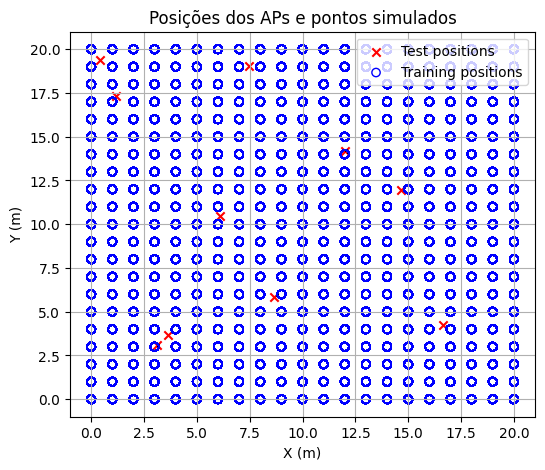

In [10]:
plt.figure(figsize=(6, 5))
plt.scatter(ap_positions[:, 0], ap_positions[:, 1], marker='x', color='red', label='Test positions')
plt.scatter(df_simulated['X'], df_simulated['Y'], marker='o', facecolors='none',
            edgecolors='blue', label='Training positions')
plt.legend()
plt.title("Posições dos APs e pontos simulados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.grid(True)
plt.show()